In [1]:
import os
import pandas as pd
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = load_model('model1.h5')

In [4]:
test_filenames = os.listdir("test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [5]:
#testing generator
test_gen = ImageDataGenerator(rescale=1./255)
test_set = test_gen.flow_from_dataframe(
    test_df, 
    "test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    color_mode="rgb",
    batch_size=1,
    shuffle=False
)

Found 96 validated image filenames.


In [6]:
import numpy as np

In [7]:
## predict
predict = model.predict_generator(test_set, steps=np.ceil(nb_samples))
predict

array([[1.12468693e-02, 7.75312930e-02, 3.47704023e-01, 5.63517869e-01],
       [7.33279670e-03, 6.08604809e-04, 2.61648148e-01, 7.30410457e-01],
       [7.08102956e-02, 2.83366181e-02, 4.72694039e-01, 4.28159028e-01],
       [1.05370224e-01, 4.36330497e-01, 4.22912031e-01, 3.53872404e-02],
       [1.13307117e-02, 1.75589100e-01, 7.56366253e-01, 5.67139015e-02],
       [7.28126988e-03, 3.94656323e-03, 8.94577801e-01, 9.41944271e-02],
       [1.89723242e-02, 5.21580517e-01, 3.79407585e-01, 8.00395310e-02],
       [2.35002488e-02, 1.00254253e-01, 7.92006910e-01, 8.42386112e-02],
       [6.69176830e-03, 6.30512135e-03, 7.64689863e-01, 2.22313270e-01],
       [1.48514949e-03, 1.46562222e-03, 7.42420793e-01, 2.54628390e-01],
       [6.35907769e-01, 6.23297803e-02, 2.04517335e-01, 9.72451121e-02],
       [3.08350287e-03, 9.91446733e-01, 2.62013893e-03, 2.84961821e-03],
       [6.27957433e-02, 3.79824430e-01, 4.65562940e-01, 9.18169692e-02],
       [1.38796885e-02, 9.67255533e-01, 4.49318858e

In [8]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category']

0     3
1     3
2     2
3     1
4     2
     ..
91    1
92    1
93    3
94    2
95    3
Name: category, Length: 96, dtype: int64

In [9]:
## output the results
result = './outcome.csv'
dataframe_sample = pd.DataFrame.from_dict(test_df)
dataframe_sample.to_csv(result,index=False)

In [ ]:
#真實圖片

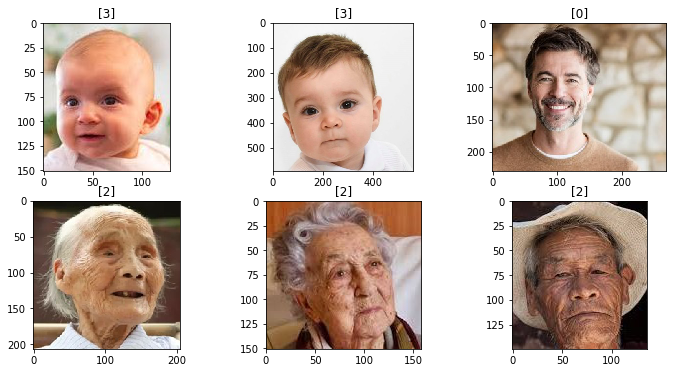

In [12]:
# import matplotlib.pyplot as plt
# import cv2
# plt.figure(figsize=(12, 6))
# for i in range(1,7):
#     ax = plt.subplot(2,3,i)
#     img = plt.imread('real/'+str(i)+'.jpg')
#     ax.imshow(img)
#     img1 = cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC) 
#     image = np.expand_dims(img1, axis=0)
#     image.astype('float32')
#     img_nor = image/255
#     outcome = model.predict_classes(img_nor)
#     ax.set_title(outcome)